In [1]:
#pip install kmodes

In [2]:
import pandas as pd

df = pd.read_csv('customer_offers.csv').set_index('customer_name')

In [3]:
from sklearn import cluster

X = df.values
bandwidth = cluster.estimate_bandwidth(X, quantile=0.1, n_samples=500)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

df['ms_cluster'] = ms.fit_predict(X)

In [4]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=4)
df['kmode_cluster'] = km.fit_predict(X)

In [5]:
model = cluster.KMeans(n_clusters=4, random_state=100)
df['kmean_cluster'] = model.fit_predict(X)

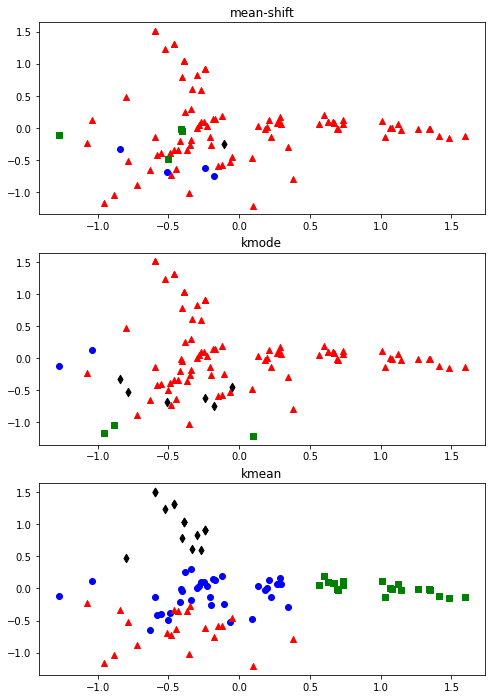

In [6]:
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['r', 'b', 'k', 'g']
markers = ['^', 'o', 'd', 's']

pca = decomposition.PCA(n_components=2)
df['pc1'], df['pc2'] = zip(*pca.fit_transform(X))

plt.figure(figsize=(8,12))

ax = plt.subplot(3, 1, 1)
for c in df['ms_cluster'].unique():
    d = df[df['ms_cluster'] == c]
    plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])    
ax.set_title('mean-shift')

ax = plt.subplot(3, 1, 2)
for c in df['kmode_cluster'].unique():
    d = df[df['kmode_cluster'] == c]
    plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])    
ax.set_title('kmode')

ax = plt.subplot(3, 1, 3)
for c in df['kmean_cluster'].unique():
    d = df[df['kmean_cluster'] == c]
    plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])    
ax.set_title('kmean')

plt.show()